# Estructura Proyecto
The present work was developed for the **Data analysis with Python** module of the National University of Colombia - Faculty of Engineering, Bogotá campus, by the students:

* Mateo Gutiérrez Melo - mgutierrezca@unal.edu.co
* Sergio Alejandro Sanchez Ortiz - chechoo.alejandro@gmail.com - sesanchezo@unal.edu.co

Video link:

## Importaciones e Instalaciones
------

En esta sección se encuentran los comandos que instalan e importan librerias necesarias para el desarrollo del proyecto

In [1]:
!pip install sodapy
!pip install -U seaborn 
!pip install -U geopandas 
!pip install -U rtree mapclassify fiona pyproj
!sudo apt install libspatialindex-dev
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.0
    Uninstalling seaborn-0.12.0:
      Successfully uninstalled seaborn-0.12.0
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 9.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 9.3 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.8 MB/s eta 0:00:0000:0100:01
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 3.0 MB/s eta 0:00:0000:

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sodapy
import geopandas as gpd 
import shapely               
from shapely.geometry import * 
from google.colab import drive
import datetime
from datetime import datetime as dt
import plotly
import plotly.express as px
from scipy import stats
import scipy

Este proyecto se realizó con las siguientes versiones:
*  *Python*: 3.7.14
*  *NumPy*:  1.21.6
*  *Pandas*:  1.3.5
*  *Matplotlib*:  3.2.2
*  *Seaborn*:  0.11.2
*  *Sodapy*: 2.2.0
*  *GeoPandas*: 0.10.2
*  *Plotly*: 5.5.0
*  *Scipy*: 1.7.3

In [ ]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)
print('Sodapy', sodapy.__version__)
print('GeoPandas', gpd.__version__)
print('Plotly', plotly.__version__)
print('Scipy', scipy.__version__)

Python 3.7.15
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2
Seaborn 0.12.1
Sodapy 2.2.0
GeoPandas 0.10.2
Plotly 5.5.0
Scipy 1.7.3


# 1.Descripción del Proyecto
----

## Problema 
------

A través de la metodología CRISP-DM se quiere analizar los conjuntos de datos por medio del uso de la estadística descriptiva para comprender si hubo una incidencia de los casos de Covid-19 positivos en la ciudad de Bogotá y su propagación en épocas de vacaciones en las demás regiones del país.

El presente trabajo contiene dos datasets importantes. El primero de ellos contiene información sobre los casos positivos de Covid-19 en Colombia y el segundo contiene información sobre los casos positivos registrados en la ciudad de Bogotá


## Objetivos 
------

**Objetivo General**
1. Determinar si existió relación entre la cantidad de casos positivos de Covid 19 y las fechas festivos/vacacionales en Colombia.

**Objetivos Específicos**
 
1.   Detallar las relaciones existentes entre las características poblacionales (sexo, edad, ubicación, etc..) y el incremento de casos positivos de Covid-19.
2.   Establecer si existen relaciones entre las variables proporcionadas por el dataset y la cantidad de casos positivos de Covid-19.
3.   Relacionar gráficamente la cantidad de casos de Covid-19 con las variables de interés.


## Hipótesis (científica o estadística)
------

Debido al aumento de interacción social durante las épocas de festividades y/o vacaciones se produce un aumento sustancial en la cantidad de casos positivos de Covid-19.

# 2.Entendimiento de los datos
----
En esta sección se usará Python para realizar un primer entendimiento de los conjuntos de datos. 

## Descripción de los dataset
------



* Dataset **Casos positivos de COVID-19 en Colombia**
-----
Inicialmente se carga el dataset **Casos positivos de COVID-19 en Colombia** encontrado en la plataforma [datos.gov](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr) y proporcionados por el **Instituto Nacional de Salud**.

A la fecha este dataset contiene **6.3 Millones de registros** relacionados con los casos positivos de Covid-19 en Colombia, el dataset se actualiza semanalmente, esto con el fin de mantener al día los estudios relacionados con el virus y su comportamiento en el país.

Se conforma por las siguientes columnas/variables:

<br/>

| Variable | Definición | Etiqueta | Valores  |
| --- | --- | --- | --- | 
| fecha reporte web | Fecha de publicación en sitio web | fecha_reporte_web | |
| ID de caso | Identificador del registro | id_de_caso | |
| Fecha de notificación | Fecha de notificación a SIVIGILA<br/> (Sistema de Vigilancia en Salud Pública) | fecha_de_notificaci_n | |
| Código DIVIPOLA departamento | Código división político administrativa<br/> del departamento | departamento | |
| Nombre departamento | Nombre del departamento<br/> (Dato limitado por confidencialidad) | departamento_nom | |
| Código DIVIPOLA municipio | Código división político administrativa <br/>del municipio | ciudad_municipio | |
| Nombre municipio | Nombre del municipio<br/> (Dato limitado por confidencialidad) | ciudad_municipio_nom || 
| Edad | Edad del paciente | edad |
| Unidad de medida de edad | Unidad de medida para la variable edad | unidad_medida | 1-Años, 2-Meses,<br/><br/> **3-Días**:<br/> No en el dataset a la fecha |
| Sexo | Sexo del paciente | sexo | F, M |
| Tipo de contagio | Como se contagia el paciente, relación<br/> con infectado o es importado | fuente_tipo_contagio | Comunitaria, Relacionado |
| Ubicación del caso | Lugar del caso covid | ubicacion | N/A, Casa, Fallecido,<br/><br/> **Hospital, Hospital UCI**: <br/>No en el dataset a la fecha |
| Estado | Gravedad del paciente | estado | Leve, Moderado, Grave, Fallecido, N/A |
| Recuperado | Estado del paciente | recuperado | Recuperado, Fallecido, N/A |
| Fecha de inicio de síntomas | Fecha de inicio de síntomas del paciente | fecha_inicio_sintomas |  |
| Fecha de muerte | Fecha de muerte del paciente | fecha_muerte |  |
| Fecha de diagnóstico | Fecha de diagnóstico del paciente | fecha_diagnostico |  |
| Fecha de recuperación | Fecha de recuperación del paciente | fecha_recuperado |  |
| Tipo de recuperación | Tipo de recuperación ya sea por segunda muestra (PCR)<br/> o por cumplir 30 días después del inicio de síntomas o muestra<br/> sin síntomas **(Menores de 70 no hospitalizados)** | tipo_recuperacion | PCR, Tiempo |
| Pertenencia étnica | Autorreconocimiento del paciente en esta variable, es importante<br/> notar que este campo depende del diligenciamiento de los<br/> profesionales y que cumpla con los criterios para pertenecer<br/> a la étnia | per_etn_ | 1-Indígena, 2-ROM, 3-Raizal, 4-Palenquero,<br/> 5-Negro, 6-Otro |
| Nombre del grupo étnico | Nombre de la étnia si aplica | nom_grupo_ |  |
| Código ISO del país  | País desde dónde viaja el paciente | pais_viajo_1_cod | |
| Nombre del país | Nombre del país correspondiente a la variable código ISO del país | pais_viajo_1_nom | |


* Dataset casos Positivos Covid-19 Bogotá
----

Este conjunto de datos suministrado por **SIVIGILIA.DC** contiene información registrada desde **Marzo 01 del 2020** con una periodicidad de actualización diaria hasta la fecha **17 de Septiembre del 2022** que fue descargado el archivo para realizar el respectivo análisis. A su vez, tiene la utilidad de permitir conocer la evolución de los casos de *Covid-19* en la ciudad de Bogotá

<br/>

| Dato                        	| Descripción                                                                                           	| Tipo de Dato 	|
|-----------------------------	|-------------------------------------------------------------------------------------------------------	|--------------	|
| CASO                        	| Valor que identifica el caso de la persona que contrajo Covid-19                                        	| int64        	|
| FECHA_DE_INICIO_DE_SINTOMAS 	| Fecha en la que se iniciaron a presentar síntomas, puede ser numérica o 'sin_dato'                    	| str          	|
| FECHA_DIAGNOSTICO           	| Fecha en la que se confirmo el contagio en el laboratorio                                             	| str          	|
| CIUDAD                      	| Ciudad en la que reside el caso                                                                       	| str          	|
| LOCALIDAD_ASIS              	| Localidad en la que reside el caso                                                                    	| str          	|
| EDAD                        	| Edad de la persona del caso la cual puede estar en días, meses o años.                                	| float        	|
| UNI_MED                     	| Unidad de medida edad del caso. '1.0' es igual a años, '2.0' es igual a meses y '3.0' es igual a días 	| float        	|
| SEXO                        	| Sexo al que pertenece el paciente                                                                     	| str          	|
| FUENTE_O_TIPO_DE_CONTAGIO   	| Tipo de contagio que se presento                                                                      	| str          	|
| UBICACION                   	| Ubicación donde se encuentra el caso la cual puede ser hospital, casa, hospital UCI, fallecido        	| str          	|
| ESTADO                      	| Estado de la persona diagnosticada. Fallecido, recuperado, Fallecido no relacionado con Covid-19      	|              	|
|                             	|                                                                                                       	|              	|

* Dataset Mapa Colombia por departamentos a través de código DIVIPOLA
----

Este conjunto de datos obtenido a través de los archivos compartidos por el **módulo 1 de Análisis y visualización de datos con python** contiene información sobre la división politico administrativa de Colombia (DIVIPOLA) con su respectiva representación geometrica para el uso de GeoPandas.

<br/>

| Variable | Definición | Etiqueta | Valores |
| --- | --- | --- | --- | 
| Código del departamento | Código DIVIPOLA del departamento | COD_DEPART |  |
| Cantidad | Cantidad de municipios pertenecientes<br/> al departamento | COUNT |  |
| Nombre del departamento | Nombre del departamento | Nombre |  |
| Geometría | Geometría usada para representar <br/> al departamento con geopandas | geometry | POLYGON, MULTIPOLYGON

## Carga De Datos
------

* DataSet **Casos positivos COVID-19 en Colombia**
-----

**EN EL PRESENTE TRABAJO SOLO SE USARÁN 3 MILLONES DE DATOS**

In [ ]:
# python client for the Socrata Open Data Api
client = sodapy.Socrata("www.datos.gov.co", None)
# dictionaries by sodapy
results = client.get("gt2j-8ykr", limit=3000000)

# Convert to pandas DataFrame
covid = pd.DataFrame.from_records(results)

covid_copia = covid.copy()

* DataSet **Casos confirmados de COVID-19 en Bogotá D.C.**
-----

In [ ]:
!gdown https://drive.google.com/uc?id=1HTBWSe6htrXYhhe6jD6xPUqjBw8LAB_0

Downloading...
From: https://drive.google.com/uc?id=1HTBWSe6htrXYhhe6jD6xPUqjBw8LAB_0
To: /content/osb_enftransm-covid-19_15092022.csv
100% 147M/147M [00:00<00:00, 159MB/s]


In [ ]:
bogota = pd.read_csv("osb_enftransm-covid-19_15092022.csv")
# Make changes to types for easier manipulation
cols = ["FECHA_DIAGNOSTICO", "FECHA_DE_INICIO_DE_SINTOMAS",]

bogota[cols] = bogota[cols].apply(pd.to_datetime, errors="coerce")
bogota_copia = bogota.copy()

# 3.Preparación de los datos
----
Esta sección será la encargada de preparar los datos para posteriormente realizar un análisis y gráficas. Para ello se usarán herramientas de limpieza de datos (Data Cleaning) y unión del conjunto de datos para manejar una sola base de datos.


## **Limpieza de los datos (Primer Dataset)**
----

Columnas a eliminar : 

| Columnas             | Accion   |
|----------------------|----------|
| departamento_nom     | Eliminar |
| ciudad_municipio_nom | Eliminar |
| pais_viajo_1_cod     | Eliminar |
| pais_viajo_1_nom     | Eliminar |


Columnas con valores nulos: 

| Columnas              | Cantidad Datos |  Acción a realizar |
|-----------------------|----------------|--------------------|
| fecha_diagnostico     | 1              | Eliminar Fila      |
| fecha_inicio_sintomas | 1251           | Agregación         |
| fecha_recuperado      | 646            | Verificación       |
| tipo_recuperacion     | 646            | Verificación       |
| fecha_muerte          | 19329          | Verificación       |
| estado                | 126            | Agregación         |

Columnas que tienen mismos nombres pero errores de escritura que deben ser cambiados: 

| Columnas   | Valor a cambiar |  Nuevo Valor           |
|------------|-----------------|------------------------|
|  Ubicacion | Casa            | casa                   |



* #### **Eliminación de datos primer dataset**
-----


* **Eliminación columna departamento_nom**

Esta columna se eliminará puesto que ya se tiene el código del departamento y a su vez, la base de datos no nos muestra todos los nombres que corresponden a los códigos DIVIPOLA mencionados con anterioridad

* **Eliminación columna ciudad_municipio_nom**

Al igual que el caso anterior, ya se cuenta con el código que representa cada departamento los cuales se usarán en un futuro. Asi mismo, se tienen errores en esta columna pues por temas de privacidad la base de datos no muestra los nombres completos, unicamente el código DIVIPOLA que representa a cada ciudad/municipio.

* **Eliminación columna pais_viajo_1_cod**

Esta columna se eliminará puesto que contiene cerca del 99.87% valores nulos los cuáles no representan información importante para el análisis de la incidencia de casos positivos en Bogotá que influyeron las demás regiones del país. 

* **Eliminación columna pais_viajo_1_nom**

Como se decidió a eliminar la columna **pais_viajo_1_cod** por su poca incidencia en el análisis y gran cantidad de valores nulos, es necesario eliminar la columna **pais_viajo_1_nom** puesto que es la representación del nombre de los países que anteriormente fueron eliminados. 

In [ ]:
covid = covid_copia.copy()
print('El porcentaje de valores nulos para la columna \'pais_viajo_1_cod\' '
      'es {}%'.format( (covid['pais_viajo_1_cod'].isnull().sum() /covid.shape[0]  * 100)) )

print('El porcentaje de valores nulos para la columna \'pais_viajo_1_nom\' '
      'es {}%'.format( (covid['pais_viajo_1_nom'].isnull().sum() /covid.shape[0]  * 100)) )


covid = covid.drop(columns = ['departamento_nom','ciudad_municipio_nom','pais_viajo_1_nom','pais_viajo_1_cod'])
print("El nuevo tamaño del dataset corresponde a {} ".format(covid.shape))

El porcentaje de valores nulos para la columna 'pais_viajo_1_cod' es 99.92093333333332%
El porcentaje de valores nulos para la columna 'pais_viajo_1_nom' es 99.92066666666666%
El nuevo tamaño del dataset corresponde a (3000000, 19) 


* **Imputación filas fecha_diagnostico con na**
---

Dado que la fecha diagnostico no está presente en algunos datos se opta por imputar la fecha de notificación del caso covid, esto debido a que se considera una buena medida por los investigadores para reemplazar los valores faltantes.

In [ ]:
# Imputation
covid.loc[covid["fecha_diagnostico"].isna(), "fecha_diagnostico"] = covid["fecha_de_notificaci_n"]

In [ ]:
# Check that the imputation is successful
print('Existen valores nulos : {}'.format(covid['fecha_diagnostico'].isnull().any()))

Existen valores nulos : False


* #### **Corrección de datos primer dataset**
----

* **Cambiar tipo de dato per_etn_**

Se cambiará el tipo de dato str por int64

In [ ]:
covid['per_etn_'] = covid['per_etn_'].astype('int64')


* **Cambio a lower y upper case según corresponda**

Se opta por realizar este cambio dado que algunos registros tienen valores con formato upper case, lower case y capitalized por lo que se considera generalizar estos valores para toda la base de datos.

In [ ]:
# Make changes to types for easier manipulation
covid["sexo"] = covid["sexo"].str.upper()
covid["recuperado"] = covid["recuperado"].str.lower()
covid["ubicacion"] = covid["ubicacion"].str.lower()
covid["estado"] = covid["estado"].str.lower()

* **Cambio de tipos en algunas columnas**

Es importante notar que las fechas traídas son de tipo object por lo que se opta por realizar una conversión a datetime de modo que sean  más fáciles de manejar.

En el caso de valores numéricos se realiza la conversión a int64 para facilitar algunas operaciones.

In [ ]:
# Make changes to types for easier manipulation
covid[["edad", "unidad_medida", "departamento"]] = covid[["edad", "unidad_medida", "departamento"]].astype(int)
cols = ["fecha_reporte_web", "fecha_de_notificaci_n", "fecha_inicio_sintomas", "fecha_muerte", "fecha_diagnostico", "fecha_recuperado"]

covid[cols] = covid[cols].apply(pd.to_datetime, errors="coerce")

* **Corrección datos fecha_inicio_sintomas**

Según la tabla anterior para la columna **fecha_inicio_sintomas** se contará con el dato **fecha_diagnostico** y se asignará un valor de **quince** días anterior que representa la fecha máxima en la cuál la persona pudo contraer Covid-19 y presentar síntomas nulos, leves o graves.


In [ ]:
# Change values for notif day - 15 days
covid.loc[covid["fecha_inicio_sintomas"].isna(), "fecha_inicio_sintomas"] = covid["fecha_de_notificaci_n"] - datetime.timedelta(days = 15)

In [ ]:
# Check that the row have been modified
print('Existen valores nulos : {} '.format(covid['fecha_inicio_sintomas'].isnull().any()))

Existen valores nulos : False 


## **Limpieza de los datos (Segundo Dataset)**

Columnas que contienen valores nulos 

| Columna                     | Cantidad de Datos | Tipo de dato nulo |
|-----------------------------|-------------------|-------------------|
| FECHA_DE_INICIO_DE_SINTOMAS | 459370            | Null              |
| LOCALIDAD_ASIS              | 58231             | Sin dato          |
| CIUDAD                      | 58231             | Sin dato          |


Columnas a las que se le debe cambiar el tipo de dato :

| Columna  | Cantidad de Datos | Tipo de dato antiguo | Tipo de dato nuevo |
|----------|-------------------|----------------------|--------------------|
| EDAD     | 459370            | FLOAT                | INT                |

Columnas con el mismo dato pero que deben cambiarse por erro de digitación : 

* FUENTE_O_TIPO_DE_CONTAGIO -> En Estudio por En estudio

| Columna  | Cantidad de Datos | Tipo de dato antiguo | Tipo de dato nuevo |
|----------|-------------------|----------------------|--------------------|
| EDAD     | 481               | En Estudio           | En estudio                |


#### Análisis de datos nulos
---

Algunas columnas de este conjunto de datos contienen valores nulos con la palabra 'Sin dato', los cuales es necesario analizarlos detalladamente pues pueden tener una incidencia en el proyecto o representar información importante.

* **Análisis columna LOCALIDAD_ASIS**
-----

Esta columna representa la localidad en la que reside el caso es por eso que se tiene la variable de 'Sin dato' la cuál representa que no existe información acerca de donde esta ubicado el paciente. Se tienen 58231 filas con esta información por lo cuál no se eliminarán a pesar de representar unicamente un 3.14% de todo el conjunto de datos totales.

In [ ]:
cantidad_datos =  bogota.LOCALIDAD_ASIS.value_counts()['Sin dato'] 
print('El porcentaje de pacientes que tienen el valor de \'Sin dato\' corresponde'
     'a {} % siendo un total de {} datos'.format((cantidad_datos/bogota.shape[0])*100,cantidad_datos))


El porcentaje de pacientes que tienen el valor de 'Sin dato' correspondea 3.143243168839946 % siendo un total de 58231 datos


* **Análisis columna CIUDAD**

Al igual que la columna anterior se tiene que existe el valor de 'Sin dato' 58231 veces, representado un 3.14%. A pesar de qué es un porcentaje bajo son bastantes datos por lo cuál se considera no eliminar dichas filas que contengan esta información puesto que pueden tener una información importante que se encontrará en futuras secciones.

In [ ]:
cantidad_datos = bogota.CIUDAD.value_counts()['Sin dato']

print('La cantidad de datos son {} y su porcentaje en el conjunto de datos es de {}% '
      ''.format(cantidad_datos, (cantidad_datos/bogota.shape[0])*100))

La cantidad de datos son 58231 y su porcentaje en el conjunto de datos es de 3.143243168839946% 


#### Corrección de datos segundo dataset
----

* **Modificación columna FECHA_INICIO_SINTOMAS**

Al igual que en el **dataset** anterior se complementará esta información suponiendo que cada paciente se contagió a lo sumo **quince** días antes de realizada la prueba, valor que corresponde a la fecha máxima en la que el virus **Covid-19** se encuentra presente en el cuerpo humano.

In [ ]:
bogota.loc[bogota['FECHA_DE_INICIO_DE_SINTOMAS'].isna(),'FECHA_DE_INICIO_DE_SINTOMAS'] = bogota['FECHA_DIAGNOSTICO'] - datetime.timedelta(days = 15) 

print('Comprobación, valores nulos en columna FECHA_DE_INCIO_DE_SINTOMAS son : {} '.format(bogota['FECHA_DE_INICIO_DE_SINTOMAS'].isnull().sum()))

Comprobación, valores nulos en columna FECHA_DE_INCIO_DE_SINTOMAS son : 0 


* **Cambio de dato columna EDAD**
-----
Esta columna contiene 1852577 los cuales se deben cambiar al tipo de dato 'int'

In [ ]:
bogota['EDAD'] = bogota['EDAD'].astype('int')

print('El tipo de dato para la columna EDAD es {} '.format(bogota.EDAD.dtypes))

El tipo de dato para la columna EDAD es int64 


* **Corrección de dato columna FUENTE_O_TIPO_DE_CONTAGIO**


In [ ]:
bogota["FUENTE_O_TIPO_DE_CONTAGIO"] = bogota["FUENTE_O_TIPO_DE_CONTAGIO"].str.lower()
print("Comprobación")
bogota.FUENTE_O_TIPO_DE_CONTAGIO.unique()


Comprobación


array(['importado', 'relacionado', 'en estudio', 'desconocido',
       'comunitaria'], dtype=object)

* **Modificación columna FECHA_INICIO_SINTOMAS**

Al igual que en el **dataset** anterior se complementará esta información suponiendo que cada paciente se contagió a lo sumo **quince** días antes de realizada la prueba, valor que corresponde a la fecha máxima en la que el virus **Covid-19** se encuentra presente en el cuerpo humano.

In [ ]:
bogota = bogota_copia.copy()

bogota.loc[bogota['FECHA_DE_INICIO_DE_SINTOMAS'].isna(),'FECHA_DE_INICIO_DE_SINTOMAS'] = bogota['FECHA_DIAGNOSTICO'] - datetime.timedelta(days = 15) 

print('Comprobación, valores nulos en columna FECHA_DE_INCIO_DE_SINTOMAS son : {} '.format(bogota['FECHA_DE_INICIO_DE_SINTOMAS'].isnull().sum()))

Comprobación, valores nulos en columna FECHA_DE_INCIO_DE_SINTOMAS son : 0 


* **Eliminación datos atípicos edad**
---
Se eliminarán las edades mayores a 100 años puesto que son edades extremadamente altas.

In [ ]:

max = bogota['EDAD'].max()
Inmax = bogota['EDAD'].idxmax()
cont = 0

while 100 < max: 
  bogota = bogota.drop([Inmax],axis = 0) 
  max = bogota['EDAD'].max()
  Inmax = bogota['EDAD'].idxmax()


# 4.Descripción inicial de los datos 
------

#### **Casos positivos COVID-19 en Colombia (Primer Dataset)**
----

In [ ]:
covid.describe(include = [np.number])

,departamento,edad,unidad_medida,per_etn_
count,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06
mean,1.166847e+03,3.936209e+01,1.003608e+00,5.904891e+00
std,5.606015e+03,1.795352e+01,6.510494e-02,6.128060e-01
min,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.100000e+01,2.600000e+01,1.000000e+00,6.000000e+00
50%,1.700000e+01,3.700000e+01,1.000000e+00,6.000000e+00
75%,6.800000e+01,5.100000e+01,1.000000e+00,6.000000e+00
max,4.700100e+04,1.140000e+02,3.000000e+00,6.000000e+00


In [ ]:
covid.describe(include = ['O'])

,id_de_caso,ciudad_municipio,sexo,fuente_tipo_contagio,ubicacion,estado,recuperado,tipo_recuperacion,nom_grupo_
count,3000000,3000000,3000000,3000000,3000000,3000000,3000000,2914881,43202
unique,3000000,1120,2,3,3,3,3,2,1321
top,2265685,11001,F,Comunitaria,casa,leve,recuperado,Tiempo,Por definir
freq,1,892682,1577104,2000242,2912383,2912383,2914881,2395430,10576


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   fecha_reporte_web      datetime64[ns]
 1   id_de_caso             object        
 2   fecha_de_notificaci_n  datetime64[ns]
 3   departamento           int64         
 4   ciudad_municipio       object        
 5   edad                   int64         
 6   unidad_medida          int64         
 7   sexo                   object        
 8   fuente_tipo_contagio   object        
 9   ubicacion              object        
 10  estado                 object        
 11  recuperado             object        
 12  fecha_inicio_sintomas  datetime64[ns]
 13  fecha_diagnostico      datetime64[ns]
 14  fecha_recuperado       datetime64[ns]
 15  tipo_recuperacion      object        
 16  per_etn_               int64         
 17  nom_grupo_             object        
 18  fecha_muerte          

#### **Casos positivos COVID-19 en Bogotá (Segundo DataSet)**
----

In [ ]:
bogota.describe(include = [np.number])

,CASO,EDAD,UNI_MED
count,1.852426e+06,1.852426e+06,1.852426e+06
mean,9.262739e+05,3.909275e+01,1.004928e+00
std,5.347813e+05,1.810003e+01,7.464691e-02
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,4.631392e+05,2.600000e+01,1.000000e+00
50%,9.262775e+05,3.700000e+01,1.000000e+00
75%,1.389399e+06,5.200000e+01,1.000000e+00
max,1.852577e+06,1.000000e+02,3.000000e+00


In [ ]:
bogota.describe(include =['O'])

,CIUDAD,LOCALIDAD_ASIS,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
count,1852426,1852426,1852426,1852426,1852426,1852426
unique,3,22,2,6,5,6
top,Bogotá,Suba,F,En estudio,Casa,Recuperado
freq,1762183,287150,1005321,1167368,1815063,1814879


In [ ]:
bogota.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852426 entries, 0 to 1852576
Data columns (total 11 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   CASO                         int64         
 1   FECHA_DE_INICIO_DE_SINTOMAS  datetime64[ns]
 2   FECHA_DIAGNOSTICO            datetime64[ns]
 3   CIUDAD                       object        
 4   LOCALIDAD_ASIS               object        
 5   EDAD                         float64       
 6   UNI_MED                      int64         
 7   SEXO                         object        
 8   FUENTE_O_TIPO_DE_CONTAGIO    object        
 9   UBICACION                    object        
 10  ESTADO                       object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 169.6+ MB


# 5.Entendimiento de los datos

----
Siguiendo la metodología **CRISP - DM** es necesario **entender** los datos por lo que se usará la estadística descriptiva y visualización de datos para cumplir con esta tarea.

## Estadística exploratoria
------

El uso de la estadística descriptiva en esta sección es importante para empezar a encontrar relaciones, diferencias y valores atípicos entre las variables. Para ello se creará un nuevo **DataFrame** que contenga la información importante sobre cada variable.

Las medidas encontradas en el DataFrame corresponden a :

* Medidas de tenencia central
  * Media
  * Moda
  * Mediana

* Medidas de dispersión
  * Desviación estandar
  * Varianza

* Kurtosis
* Sesgo

* Máximos y minimos

El respectivo DataFrame contiene la siguiente estructura : 

|          | count | mean | std | min | 25% | 50% | 75% | max | kurtosis | skew | Range |
|----------|-------|------|-----|-----|-----|-----|-----|-----|----------|------|-------|
| variable |       |      |     |     |     |     |     |     |          |      |       |


#### Primer DataSet
---
A continuación se realiza la estadistica exploratoria para las variables númericas y aquellas que no usando conceptos de **tasas**,**proporciones** y **razones**.

* **Estadística para variables numéricas**
---


In [ ]:
# Create DataFrame structure
estadistica_covid = covid.describe().drop(columns = ['departamento']).T

kurtosis = [covid.edad.kurtosis(),covid.unidad_medida.kurtosis(),covid.per_etn_.kurtosis()]

skew = [covid.edad.skew(),covid.unidad_medida.skew(),covid.per_etn_.skew()]

range = [covid.edad.max() - covid.edad.min(),
        covid.unidad_medida.max() - covid.unidad_medida.min(),
        covid.per_etn_.max() - covid.per_etn_.min()]

estadistica_covid = estadistica_covid.assign(kurtosis = kurtosis,skew = skew, range = range)

columns = [covid.fecha_inicio_sintomas,covid.fecha_diagnostico]

for column in columns :
  data = [column.value_counts().sum(),column.mean(),
            column.std(),column.min(),
            column.quantile(0.25),column.quantile(0.50),column.quantile(0.75),
            column.max(),np.nan,np.nan,column.max() - column.min()]
  columns_name = ['count','mean','std','min','25%','50%','75%','max','kurtosis','skew','range']

  temp_series = pd.DataFrame(data = [data],index = [column.name],columns=columns_name)

  estadistica_covid = estadistica_covid.append(temp_series,ignore_index= False)

estadistica_covid

,count,mean,std,min,25%,50%,75%,max,kurtosis,skew,range
edad,3000000.0,39.362092,17.953524,1.0,26.0,37.0,51.0,114.0,-0.144565,0.434133,113
unidad_medida,3000000.0,1.003608,0.065105,1.0,1.0,1.0,1.0,3.0,444.289118,19.907978,2
per_etn_,3000000.0,5.904891,0.612806,1.0,6.0,6.0,6.0,6.0,56.448799,-7.486857,5
fecha_inicio_sintomas,3000000.0,2021-02-19 10:08:53.376001024,124 days 22:39:23.520554410,2020-02-27 00:00:00,2020-11-20 00:00:00,2021-03-04 00:00:00,2021-06-14 00:00:00,2021-12-29 00:00:00,NaN,NaN,671 days 00:00:00
fecha_diagnostico,3000000.0,2021-03-01 01:54:34.300800768,124 days 05:24:53.390960168,2020-03-06 00:00:00,2020-11-28 00:00:00,2021-03-13 00:00:00,2021-06-24 00:00:00,2021-12-30 00:00:00,NaN,NaN,664 days 00:00:00


* **Interpretación de resultados**
---
Dado el DataFrame anterior se pueden realizar las siguientes interpretaciones: 

* Intepretación para la variable edad : 

  * Se tiene una media de edad de 39.36 años de personas diagnosticadas por contagio de covid-19.
  * Dado una desviación estándar de 17 años, nos damos cuenta que los datos estan alejados unos de otro, y al tratarse de una enfermedad catalogada como **Pandemía** nos damos cuenta que dicha desviación es correcta puesto que afecto a toda la población de todas las edades. Este hecho también se puede comprobar debido al Rango de 99 años que tenemos, pues se tienen valores de edades muy pequeña, incluso de dias o meses hasta años muy grandes como el máximo de 100 años que se puede evidenciar.
  
  * El 25% o menos de personas diagnosticas con covid-19 tienen una edad de 26 años y el 50% o menos tiene una edad máxima de 37 años. A su vez, nos damos cuenta que el 75% o menos tienen una edad de 51 años para el contagio de covid-19. Esto se puede apreciar debido a las medidas tomadas por las familias y gobierno de permanecer en cuarentena aquellos individuos de una edad superior o igual a los 60 años. Estos percentiles nos indican que la población adulta-vieja no tuvo tantos contagios positivos respecto a la adulta-joven.

  * Para complementar el análisis anterior en donde la mayoria de contagios se econtraban en edades jovenes o adultas-jovenes podemos darnos cuenta que la dispersión de los datos se encuentra hacia la izquierda, es decir, que hay mayor cantidad de contagio en esas edades que en edades avanzadas. 


Antes de realizar una interpretación de los datos recordemos que significan los valore de 1,2 y 3 en la siguiente tabla

| Valor |  Unidad Medida |
|-------|----------------|
| 1     | Años           |
| 2     | Días           |
| 3     | Meses          |

* Interpretación para la variable unidad_medida: 

  * El promedio de la población es de caracter 'Años' es decir que el promedio de personas que fueron diagnosticadas con Covid-19 tienen por lo menos un año de vida. 
  
  * Podemos afirmar que la mayoria de pacientes su edad es media en años por lo que mínimo tienen un año de vida, puesto que, los datos se encuentran muy cercanos a la media que es 1, lo cuál lo podemos confirmar por medio del valor de la kurtosis.

  * Hay un sesgo hacia la izquierda el cuál nos indica nuevamente que la frecuencia de los datos se encuentran dirigidos hacia la unidad de media de años. 


Antes de realizar un análisis recordemos el valor que representa cada comunidad por medio de la siguiente tabla 

| Valor |  Grupo Étnico |
|-------|---------------|
| 1     | Indígena      |
| 2     | ROM           |
| 3     | Raizal        |
| 4     | Palenquero    |
| 5     | Negro         |
| 6     | Otro          |

* Interpretación para la variable per_etn:

  * La media de los datos se encuentra en la categoria de 'OTRO' con una desviación del 0.61, en donde, gracias a la kurtosis podemos darnos cuenta que la mayoria de los datos se encuentran cercanos a la media. Es decir, que la mayoria de los pacientes se identifican como pertenencientes a 'OTRA' étnia. Asi mismo, podemos detallar que la distribución de los datos se encuentra sesgada hacia la derecha confirmando así que la mayoria de las personas se identican como 'OTRO'.

  * El dato más representado fue el 6 que corresponde al grupo étnico 'OTRO' puesto que el valor de la moda y el percentil 50 nos lo indican.


* Interpretación para la variable fecha_inicio_sintomas : 

  * Según los datos obtenidos en la base de datos se presenta que el 75% de inicio de sintomas en los pacientes se dierón entre la fecha 2020-02-27 y 2021-06-14. Lo que significa que despues del mes de Junio del 2021 los casos que presentaban sintomas empezaron a disminuir hasta la fecha máxima que se tiene que es 2021-12-29.

  * Hay una gran desviación (124 días) entre las fechas de inicio de sintomas, lo que significa que a lo largo de los años de estudio hubo incrementos (picos) y valles de contagios que se expresan por medio del inicio de sintomas. Los cuáles en siguientes secciones se detallarán por medio de otras herramientas matemáticas y visuales

  * En los 671 días que se tienen registros se sabe que el dia que hubo el dia 4 del mes de Marzo del 2021 hubo mayor expresión de sintomas en las personas contagiadas por covid-19 puesto que se encuentra en el percentil 50 o también conocido como la moda, representado así el dato con mayor número de repeticiones

* Interpretación para la variable fecha_diagnostico

* El día que hubo un mayor diagnostico de los 671 días de estudio corresponde al 2021-03-13 el cuál es muy similar al día en el cuál las personas sintieron mayor sintomas, hecho que comprueba la veracidad de la afirmación anterior.

* Con una desviación de 124 días podemos y la media de diagnostico para el día 2021-03-01 podemos afirmar que el diagnostico de la enfermedad se encuentra muy distante entre las fechas, por lo que se puede decir que en el intervalo de tiempo de estudio hubo picos y valles de diagnostico. En futuras secciones se hará hincapié en esta afirmación.





* **Estadística para variables no numéricas**
---

Debido a qué no se pueden realizar medidas de resumen como las anteriores para variables cualitativas puesto que no tienen un significado lógico y matemático. Usaremos como medidas de resumen las **tasas**, **proporciones** y **razones** entre diferentes variables cualitativas. 

Antes de realizar dicho procedimiento mencionado anteriormente es importante recordar los siguientes conceptos:

* **Razones**: Comparación hecha por medio de la división de dos conjuntos diferentes. $Razon = \frac{Conjunto A}{Conjunto B}$

* **Proporciones**: Comparación realizada por medio de la división entre un subconjunto y el mismo conjunto de datos. $Proporción = \frac{SubConjunto A}{Conjunto A}$

* **Tasas**: Comparación hecha por medio de la división de la frecuencia de un subconjunto de datos que representa un evento determinado por un conjunto de posibles en los que se puede dar dicho caso. $Tasas = \frac{FrecuenciaEventoA}{PoblacionDondePuedeOcurrir A}$


* **Razón para el sexo**
-----
En esta parte se realizará una proporción para el sexo respecto a la edad en intervalos de 10 años , estado y tipo o fuente de contagio.

Esto se hace con la finalidad de entender la proporción y si existe alguna incidencia respecto al genero y su relación con el contagio de covid-19.

* **Sexo/Estado**

In [ ]:
copia = covid.copy()

# Get female and male amount

hombres = int(covid.sexo.where(covid.sexo == 'M').value_counts())
mujeres = int(covid.sexo.where(covid.sexo == 'F').value_counts())

# Create intervals for the age

# Razon hombres y mujeres respecto al estado
leve = int(covid.estado.where(covid.estado == 'leve').value_counts())
fallecido = int(covid.estado.where(covid.estado == 'fallecido').value_counts())

print('Razón Hombres vs Estado leve  {} \n'.format(hombres / leve))
print('Razón Hombres vs Estado Fallecido  {} \n'.format(hombres / fallecido))
print('Razón Mujeres vs Estado leve  {} \n'.format(mujeres / leve))
print('Razón Mujeres vs Estado Fallecido  {} \n'.format(mujeres / fallecido))


Razón Hombres vs Estado leve  0.4885676094112622 

Razón Hombres vs Estado Fallecido  19.37943151328603 

Razón Mujeres vs Estado leve  0.5415166892541262 

Razón Mujeres vs Estado Fallecido  21.479699821581793 



* **Interpretación Razón sexo/estado**

Dados los valores anteriores podemos realizar las siguientes interpretaciones : 

  > Existen 0.5 hombres que se diagnositicaron con covid - 19 por cada paciente en estado leve

  > Existen 19 hombres que tuvieron covid-19 por cada persona fallecida

  > Existen 0.5 mujeres que tuvieron covid-19 por cada persona persona en estado leve

  > Existen 21 mujeres que tuvieron covid-19 por cada persona fallecida



* **Razón sexo/fuente contagio**

In [ ]:
comunitaria = int(covid.fuente_tipo_contagio.where(covid.fuente_tipo_contagio == 'Comunitaria').value_counts())
relacionado = int(covid.fuente_tipo_contagio.where(covid.fuente_tipo_contagio == 'Relacionado').value_counts())
importado = int(covid.fuente_tipo_contagio.where(covid.fuente_tipo_contagio == 'Importado').value_counts())

print('Razón Hombre / comunitaria {} \n'.format(hombres / comunitaria))
print('Razón Hombre / relacionado {} \n'.format(hombres / relacionado))
print('Razón Hombre / importado {} \n'.format(hombres / importado))

print('Razón Mujeres / comunitaria {} \n'.format(mujeres / comunitaria))
print('Razón Mujeres / relacionado {} \n'.format(mujeres / relacionado))
print('Razón Mujeres / importado {} \n'.format(mujeres / importado))


Razón Hombre / comunitaria 0.71136192520705 

Razón Hombre / relacionado 1.4266266286338776 

Razón Hombre / importado 599.6190476190476 

Razón Mujeres / comunitaria 0.788456596751793 

Razón Mujeres / relacionado 1.5812389398276494 

Razón Mujeres / importado 664.6034555415087 



* **Interpretacion Razón sexo/fuente o tipo de contagio**

> Por cada 0.71 hombres hay un paciente que se contagió de manera comunitaria

> Por cada 1.42 hombres hay un paciente que su tipo de contagio fue relacional

> Por cada 600 hombres hay un paciente que se contagio de manera externa ( importado fuera del país )

> Por cada 0.78 mujeres hay un paciente que se contagió de manera comunitaria

> Por cada 1.58 mujeres hay un paciente que su tipo de contagio fue relacional

> Por cada 664 hombres hay un paciente que se contagio de manera externa ( importado fuera del país )


* **Razón sexo/edad**

Acá se realizarán 11 intervalos para la edad.


In [ ]:
intervalos = []
for i in np.arange(10,112,10):
  intervalos.append(covid.edad.where((i-9 <= covid.edad)  & (covid.edad <= i)).value_counts().sum())

for i in np.arange(1,11):
  print('Razón hombres vs Intervalo {} es {}'.format(i,hombres/intervalos[i-1]))
  print('Razón mujeres vs Intervalo {} es {}\n'.format(i,mujeres/intervalos[i-1]))

Razón hombres vs Intervalo 1 es 12.247656592957298
Razón mujeres vs Intervalo 1 es 13.575010544255747

Razón hombres vs Intervalo 2 es 5.363084356967054
Razón mujeres vs Intervalo 2 es 5.9443148281463785

Razón hombres vs Intervalo 3 es 2.118325224651188
Razón mujeres vs Intervalo 3 es 2.3479011713423095

Razón hombres vs Intervalo 4 es 2.1421671945946597
Razón mujeres vs Intervalo 4 es 2.374327042358694

Razón hombres vs Intervalo 5 es 2.884180441678744
Razón mujeres vs Intervalo 5 es 3.196756833453263

Razón hombres vs Intervalo 6 es 3.6457963944204734
Razón mujeres vs Intervalo 6 es 4.04091379610745

Razón hombres vs Intervalo 7 es 6.3310166852057845
Razón mujeres vs Intervalo 7 es 7.017147942157953

Razón hombres vs Intervalo 8 es 12.532663936231119
Razón mujeres vs Intervalo 8 es 13.890905888052142

Razón hombres vs Intervalo 9 es 27.926205055738734
Razón mujeres vs Intervalo 9 es 30.95273983356885

Razón hombres vs Intervalo 10 es 150.97039787798408
Razón mujeres vs Intervalo 10 

* **Interpretación sexo vs edad**

> Por cada 12 hombres hay una persona contagiada entre 1 y 10 años
> Por cada 13 mujeres hay una persona contagiada entre 1 y 10 años

Como nos damos cuenta la interpretación es la misma de manera iterada por lo que se invita a realizar dichas interpretaciones por cuenta propia dada la información anterior. Sin embargo nos damos cuenta que hay unas interpretaciones importantes que realizar. 

> Por cada 2 hombres y 2 mujeres hay una persona contagiada en los intervalos de 31 a 51 años, información que anteriormente habiamos enunciado.

* **Proporción Estado vs tipo contagio**


In [ ]:
tipo_contagio = [comunitaria,importado,relacionado]
tipo = ['comunitaria','importado','relacionado']
for i in np.arange(3): 
  print("Razón estado leve vs tipo contagio {} es {}".format(str(tipo[i]),leve/tipo_contagio[i]))
  print("Razón estado fallecido vs tipo contagio {} es {} \n".format(str(tipo[i]),fallecido/tipo_contagio[i]))

Razón estado leve vs tipo contagio comunitaria es 1.4560153221460204
Razón estado fallecido vs tipo contagio comunitaria es 0.036707058445928045 

Razón estado leve vs tipo contagio importado es 1227.30004214075
Razón estado fallecido vs tipo contagio importado es 30.941002949852507 

Razón estado leve vs tipo contagio relacionado es 2.9200188492908956
Razón estado fallecido vs tipo contagio relacionado es 0.07361550454438356 



* **Interpretación Estado vs Tipo contagio**

Se pueden realizar las siguientes interpretaciones importantes

> Por cada paciente en estado leve hay uno que se contagio de manera comunitaria
> Por cada 1227 pacientes en estado leve hay uno que se contagio de manera importada
> Por cada 2 pacientes en estado leve hay uno que se contagio de manera relacionada
> Por cada 30 fallecidos hay un contagio por importado ( fuera del país )

* **Proporción para el estado**
---
A continuación se realizará una medida de resumen para la variable estado usando la proporción.


In [ ]:
print("Proporción leve : {}".format(leve/(leve+fallecido)))
print("Proporcion Fallecido : {}".format(fallecido/(leve+fallecido)))


Proporción leve : 0.975409319962516
Proporcion Fallecido : 0.024590680037484016


Al momento de realizar una interpretación nos damos cuenta que el porcentaje de casos de fallecimiento en nuestro dataset del país corresponde unicamente al 2% del total de casos. Sin embargo, es un número bastante grande de personas pues equivale a 73423 muertes en tan solo 641 dias debido a una enfermedad.

* **Proporción para el sexo**
----

In [ ]:
print("Proporción hombres : {}".format(hombres/(hombres+mujeres)))
print("Proporción mujeres : {}".format(mujeres/(hombres+mujeres)))

Proporción hombres : 0.47429866666666665
Proporción mujeres : 0.5257013333333334


La interpretación nos indica que hay mayor contagio de covid-19 en nuestro conjunto de datos por parte de mujeres con un porcentaje del 52% de toda la población del dataset.

Esta información también se puede evidenciar en la sección de **RAZONES** en donde cada razón que de mujeres era mucho mayor que a la razón de hombres.

* **Proporción para tipo de contagio**
----

In [ ]:
print("Proporción para el tipo de contagio comunitario {}\n".format(comunitaria/(comunitaria+importado+relacionado)))
print("Proporción para el tipo de contagio relacionado {}\n".format(relacionado/(comunitaria+importado+relacionado)))
print("Proporción para el tipo de contagio importado {}".format(importado/(comunitaria+importado+relacionado)))

Proporción para el tipo de contagio comunitario 0.6667473333333334

Proporción para el tipo de contagio relacionado 0.33246166666666666

Proporción para el tipo de contagio importado 0.000791


La interpretación que se puede llegar a tener es que un 66,66% de los datos obtenidos corresponden a un tipo de contagio comunitario y que el tipo de contagio proveniente de otros paises (importado) no tiene mayor incidencia en el contagio de Covid-19.

#### **Segundo DataSet**
---
A continuación se realiza la estadistica exploratoria para las variables númericas y aquellas que no haciendo uso de **razones** y **proporciones**.

In [ ]:
kurtosis = [bogota['EDAD'].kurtosis(),bogota['UNI_MED'].kurtosis()]
skew = [bogota['EDAD'].skew(),bogota['UNI_MED'].skew()]
range = [bogota['EDAD'].max() - bogota['EDAD'].min(), bogota['UNI_MED'].max()-bogota['UNI_MED'].min()]

estadistica_bogota = bogota.drop(columns = ['CASO']).describe().T

estadistica_bogota = estadistica_bogota.assign(kurtosis = kurtosis,skew = skew,range = range)

# Append values for FECHA_DE_INICIO_DE_SINTOMAS and FECHA_DIAGNOSTICO

columnas = [bogota.FECHA_DE_INICIO_DE_SINTOMAS,bogota.FECHA_DIAGNOSTICO]

for column in columnas :
  data = [column.value_counts().sum(),column.mean(),
            column.std(),column.min(),
            column.quantile(0.25),column.quantile(0.50),column.quantile(0.75),
            column.max(),np.nan,np.nan,column.max() - column.min()]
  columns_name = ['count','mean','std','min','25%','50%','75%','max','kurtosis','skew','range']

  temp_series = pd.DataFrame(data = [data],index = [column.name],columns=columns_name)
  
  estadistica_bogota = estadistica_bogota.append(temp_series,ignore_index= False)

estadistica_bogota

,count,mean,std,min,25%,50%,75%,max,kurtosis,skew,range
EDAD,1852426.0,39.09275,18.10003,0.0,26.0,37.0,52.0,100.0,-0.198420,0.377734,100.0
UNI_MED,1852426.0,1.004928,0.074647,1.0,1.0,1.0,1.0,3.0,302.018132,16.469934,2.0
FECHA_DE_INICIO_DE_SINTOMAS,1852426.0,2021-05-04 02:08:17.299864320,190 days 12:02:05.943284216,2020-02-26 00:00:00,2020-12-18 00:00:00,2021-05-14 00:00:00,2021-07-13 00:00:00,2022-09-09 00:00:00,NaN,NaN,926 days 00:00:00
FECHA_DIAGNOSTICO,1852426.0,2021-05-12 01:57:34.392887296,188 days 14:38:43.735870162,2020-03-06 00:00:00,2020-12-27 00:00:00,2021-05-24 00:00:00,2021-07-18 00:00:00,2022-09-13 00:00:00,NaN,NaN,921 days 00:00:00


* **Interpretación de resultados**
---

Antes de realizar una interpretación de los datos es importante destacar que para la variable **edad** y **unidad de medida** se tienen muchas similitudes en términos de la media, desviación estándar, percentiles, kurtosis, asimetria y rango. Esto nos indica de primera mano que los datos de ambas bases de datos son consistentes o representan un mismo evento que en nuestro caso corresponde al contagio y diagnostico de covid-19. 





* **Interpretación para la edad**
  * Podemos detallar que la media de personas positivas para el contagio de covid-19 en Bogotá fueron de 39 años y el 75% o menos de dichos contagios tiene a lo sumo 52 años. Hecho que ratifica las medidas tomadas por familias para realizar una cuarentena de las personas de mayor edad. 

  * Podemos evidenciar que hay una desviación de los datos de 18 años, lo cuál significa que los contagios a pesar de ser sesgados para edades jovenes o adultos-jovenes se presentaron en todas las edades pero no tan alejados de la media de 39 años.

  * La edad en la que más se presento un reporte positivo de covid-19 fue de 37 años

* **Interpretación para la unidad de medida**

> Recordemos que '1' equivale a 'Años', '2' a 'Meses' y '3' a 'días'.
  * La media de los datos y moda es de '1' lo que representa que la mayoria de datos corresponden a personas que tienen como minimo un año de vida y su unidad de medida corresponde al "Año".
  * Los datos no tienen una desviación grande, por lo que podemos afirmar que la mayoria de estos se encuentran cerca a la unidad de mediad "Año". A su vez, podemos verificarlo puesto que se tiene una distribución sesgada hacia la izquierda, lo que significa que la mayoria de datos se encuentran en la variable "Año".

* **Interpretación para fecha inicio sintomas**

  * Este dataset contiene más información respecto a las fechas pues tiene el registro de 926 días. El día que mayor casos de covid hubo fue el 2020-12-18 que fue 9 días antes que se registrará el dia con más reportes de contagios, lo cuál nos indica la veracidad de la información pues esta entre el rango de 15 días de posible contagio y presentación de sintomas.

  * A partir del día 2021-07-18 se tiene que hay unicamente un 25% de los datos registrados para el inicio de los sintomas.

  


In [ ]:
# covid.groupby(pd.PeriodIndex(covid["fecha_de_notificaci_n"]))
data_year = covid.resample("Y", on='fecha_de_notificaci_n').mean()
data_year[:-1]

,departamento,edad,unidad_medida,per_etn_
fecha_de_notificaci_n,,,,
2020-12-31,1097.098968,40.005774,1.004319,5.881023
2021-12-31,1201.217978,39.044907,1.003257,5.916653


## Uniones de datasets
------


En cuanto a Uniones de datasets se realizó un inner join entre el dataset `covid` y el GeoPandasDataFrame obtenido a partir del archivo .shp para la representación del mapa de Colombia por departamentos usando la clasificación DIVIPOLA.

El inner merge se realiza haciendo ***match*** entre las columnas **departamento** del dataframe covid y la columna **COD_DEPART** del dataframe col_deps.

Para un mejor entendimiento de este proceso a continuación se muestra como funciona el inner merge a través de una imagen:

![imagen_2022-09-18_184431848.png](https://www.ionos.es/digitalguide/fileadmin/DigitalGuide/Screenshots_2019/inner-join.png)

> Imagen tomada de https://www.ionos.es/digitalguide/hosting/cuestiones-tecnicas/inner-join/

In [ ]:
!gdown https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir
!unzip colombia.zip

Downloading...
From: https://drive.google.com/uc?id=1wMwLcKZ0v18Dwse0Ln1-GTimFHpgSlir
To: /content/colombia.zip
100% 50.2M/50.2M [00:00<00:00, 167MB/s]
Archive:  colombia.zip
  inflating: divipola_dpto_index.hdf  
  inflating: divipola_mun_index.hdf  
  inflating: shapes/Cabecera Municipal.dbf  
  inflating: shapes/Cabecera Municipal.prj  
  inflating: shapes/Cabecera Municipal.sbn  
  inflating: shapes/Cabecera Municipal.sbx  
  inflating: shapes/Cabecera Municipal.shp  
  inflating: shapes/Cabecera Municipal.shp.xml  
  inflating: shapes/Cabecera Municipal.shx  
  inflating: shapes/desktop.ini      
  inflating: shapes/Fuera colombia.dbf  
  inflating: shapes/Fuera colombia.prj  
  inflating: shapes/Fuera colombia.sbn  
  inflating: shapes/Fuera colombia.sbx  
  inflating: shapes/Fuera colombia.shp  
  inflating: shapes/Fuera colombia.shx  
  inflating: shapes/Limite Departamental.dbf  
  inflating: shapes/Limite Departamental.prj  
  inflating: shapes/Limite Departamental.sbn  
  in

In [ ]:
col_deps = gpd.read_file(r"shapes/Limite Departamental.shp")  # Departamentos
col_deps[["COD_DEPART"]] = col_deps[["COD_DEPART"]].astype(int)

In [ ]:
groupedByDepartment = covid.groupby(["departamento"], as_index=False).size()
departmentWithGeometry = pd.merge(groupedByDepartment, col_deps, left_on="departamento", right_on="COD_DEPART")

## Visualización de datos
------

Ahora bien, a continuación se presentarán algunas visualizaciones que se consideraron interesantes por parte de los investigadores.

Para visualizar el estado de los casos y la relación de estos con la edad y sexo del paciente se optó por utilizar un stripplot, muy similar al swarmplot, en este caso se usa un stripplot por la cantidad de datos que se está manejando.

La función `stripplot` permite que los puntos se solapen y los ajusta al eje x que contiene las variables categoricas.

<br/>
<br/>

Del siguiente gráfico lo primero que se observa es que en edades más tempranas de 0 a apróx 20 años los casos de deceso a causa de covid 19 no son muy comunes.

También se evidencia poca diferencia entre el estado de los pacientes según se sexo, por lo que parece no ser un factor determinante en el estado de las personas.



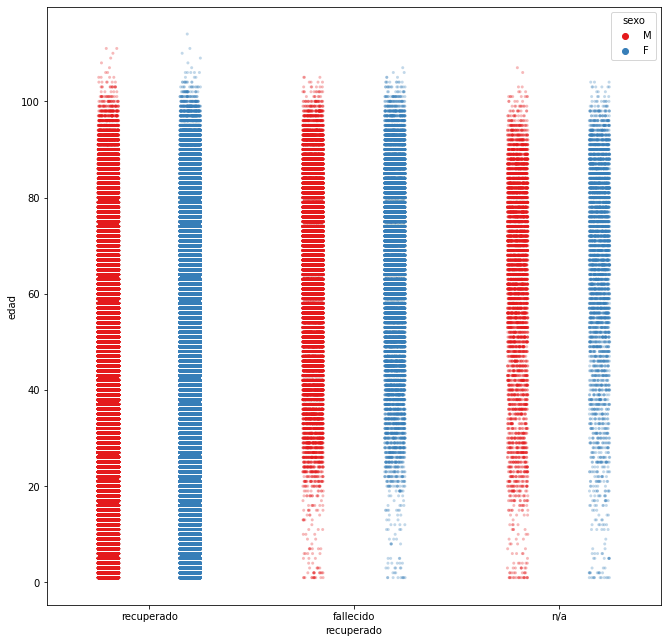

In [ ]:
plt.figure(figsize=(11,11))
covid_stripplot = sns.stripplot(x="recuperado", y="edad", data=covid, palette="Set1", hue="sexo", alpha=0.3, dodge=True, size=3);

También se realizó la gráfica de la cantidad de casos de covid 19 vs la edad, de esta figura podemos aprecia como el promedio se encuentra al rededor de los 39 años aproximadamente.

Destaca que conforme se avanza hasta llegar a la edad de 39 la cantidad de casos aumento y posterior a cumplir esa cantidad de años la cantidad de casos empieza a decrecer, este comportamiento puede estar relacionado con los hábitos y actividades que realiza una persona según su edad, resultando en mayores posibilidades de contagio para determinados grupos.

In [ ]:
covidByEdad = covid.groupby("edad", as_index=False).size()
px.line(data_frame=covidByEdad, x="edad", y="size")

A partir de la agrupación obtenida en la sección de Unión de datasets se obtuvo el dataframe `departmentWithGeometry`, en esta sección se convierte en GeoDataFrame de modo que sea posible usar las características de geometría y mapas de la librería GeoPandas.

A continuación se presenta un mapa coroplético de la cantidad de casos positivos Covid-19 por departamento, rápidamente destaca el centro del país como un foco grande de casos, adicionalmente se evidencia que en zonas con ciudades principales también hay un aumento de casos.

In [ ]:
geopandasMap = gpd.GeoDataFrame(departmentWithGeometry)

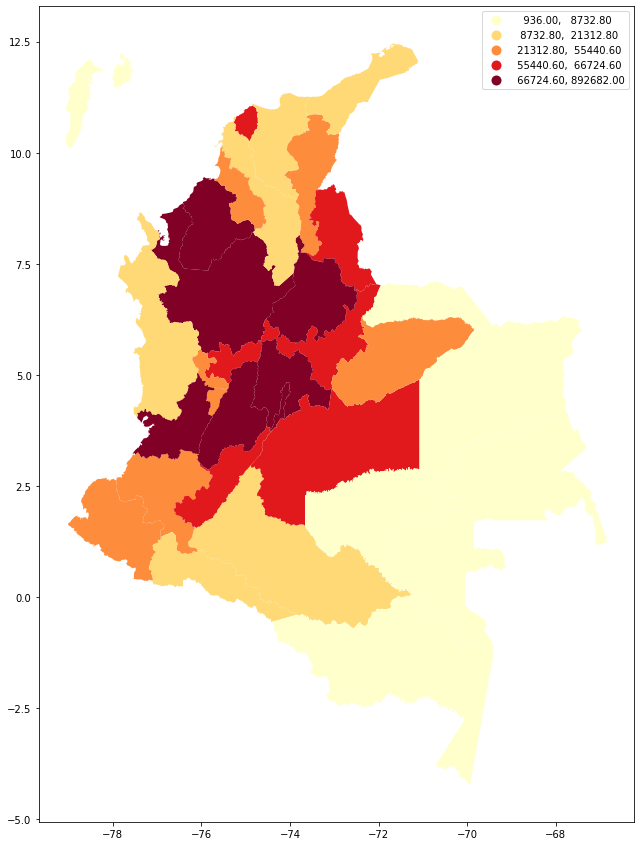

In [ ]:
geopandasMap.plot(column='size',
           cmap='YlOrRd', 
           scheme='quantiles',
           legend=True,
           figsize = (15,15));

Profundizando un poco más en la meta de estudio del presente trabajo se realiza un gráfico de dispersión de la cantidad de casos a través del tiempo.

En este apartado destacan 2 picos bastante pronunciados que coinciden con los meses de Enero y Junio que de hecho comprenden el periodo de vacaciones de los colombianos.

In [ ]:
covidByDate = covid.groupby("fecha_diagnostico", as_index=False).size().sort_values(by="fecha_diagnostico")
px.scatter(data_frame=covidByDate, x="fecha_diagnostico", y="size")

A continuación se grafica a través de un gráfico de barras la cantidad de casos covid-19 por mes en el territorio colombiano, para ello se crea una nueva columna y a partir de cada registro se toma la columna `fecha_de_notificaci_n` que es de tipo datetime, allí se obtiene el mes y se procede a plotear usando plotly.

In [ ]:
covid['month'] = covid['fecha_de_notificaci_n'].dt.month
casesGroupedByMonth = covid.groupby("month", as_index=False).size()
fig = px.bar(casesGroupedByMonth, x="month", y="size", title="Cases by month")
fig.update_xaxes(type="category")

Se realiza el mismo gráfico pero esta vez usando solo lineas para ver si se puede identificar alguna tendencia en la cantidad de casos.
Inicialmente se ve como en el 6to mes del año que típicamente corresponde a las vacaciones de mitad de año se produce un pico de casos, es interesante revisar este dato ya que nos hace sospechar que las épocas de vacaciones influyen en la cantidad de casos Covid en Colombia.

In [ ]:
px.line(casesGroupedByMonth, x="month", y="size", title="Cases by month")

Ahora bien, se decide analizar la cantidad de casos por meses de modo que se puedan establecer algunas relaciones entre los periodos de vacaciones y la cantidad de casos.

Se considera el periodo de vacaciones comprendido por los meses:

* Enero
* Junio
* Julio
* Noviembre
* Diciembre

In [ ]:
# Function to create column based on vacation months

def checkInRangeDate(timestamp):
  if 6 <= timestamp.month <= 7:
    return True
  elif timestamp.month == 12:
    return True
  elif timestamp.month == 1:
    return True
  else:
    return False 

covid["vacation"] = covid["fecha_de_notificaci_n"].apply(checkInRangeDate)

covidByVacation = covid.groupby("vacation").size()
covidByVacation

vacation
False    1097392
True     1902608
dtype: int64

Se crea una nueva columna usando la función `checkInRangeDate()` que determina si un mes se encuentra en el periodo de vacaciones establecido.
Y luego se procede a usar un gráfico de torta para ver la cantidad de casos que cumplen la condición de estar en este periodo.

Rápidamente nos damos cuenta que más de la mitad de los casos positivos, más concretamente el 63.4% de los registro de la muestra se concentran en el periodo calificado como ***In Vacation***, mientras que solo el 36.6% pertenece al grupo caracterizado como ***Not in vacation***.

(-1.114439968010781, 1.100687617524323, -1.111205763005281, 1.1190837823082893)

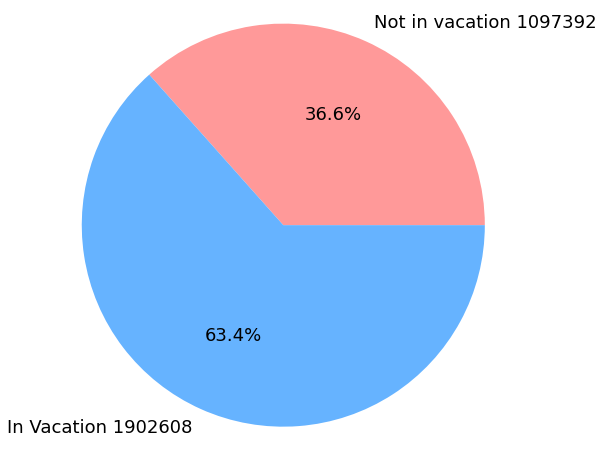

In [ ]:
fig1, ax1 = plt.subplots(figsize=(8, 8))

inVacation = covidByVacation[0]
notInVacation = covidByVacation[1]
colors = ['#ff9999','#66b3ff']
labels = [f"Not in vacation {inVacation}", f"In Vacation {notInVacation}"]
ax1.pie(covidByVacation, autopct='%1.1f%%', labels=labels, textprops={'fontsize': 18}, colors=colors)
ax1.axis('equal')

A través de la función `crosstab()` se crea una tabla de contingencia, esto con el objetivo de posteriormente graficar un mapa de calor y revisar en qué meses se concentra un gran número de casos y si estos son considerados como meses de vacaciones.

In [ ]:
contigency = pd.crosstab(covid["vacation"], covid["month"])
contigency

month,1,2,3,4,5,6,7,8,9,10,11,12
vacation,,,,,,,,,,,,
False,0,114928,107443,119747,133282,0,0,226207,115527,150984,129274,0
True,364047,0,0,0,0,782054,538063,0,0,0,0,218444


Revisando la información anterior pero esta vez a través de un mapa de calor vemos como se concentra la gran mayoría de registros en los meses 1, 6 y 7 que están caracterizados por pertenecer a las vacaciones.

También se ve como en el mes 8 (Agosto) hay un importante número de casos ,sucede lo mismo para el mes 12 (Diciembre).

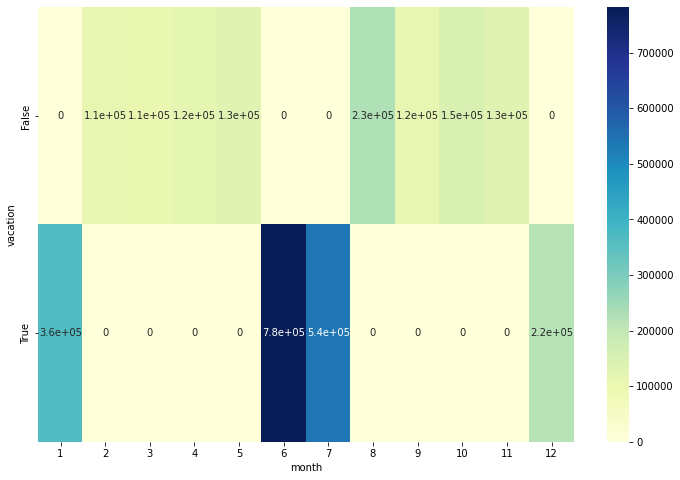

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

## Pruebas de correlación
----

Se realiza una prueba de correlación de pearson con respecto a las fechas en general y la cantidad de casos positivos que arroja los siguiente resultados:

El coeficiente de correlación de pearson arroja un valor de 0.449225, el valor es mayor que 0 pero sigue siendo bastante bajo, esto debido a que la cantidad de casos se concentra en algunos puntos pero luego se dispersa, resultando así en una correlación débil.

In [ ]:
covidCorr = covidByDate.copy()
covidCorr.fecha_diagnostico = pd.to_numeric(covidCorr.fecha_diagnostico)
covidCorr.corr(method="pearson")

,fecha_diagnostico,size
fecha_diagnostico,1.000000,0.449225
size,0.449225,1.000000


En esta segunda prueba de correlación se toman parámetros más específicos.

Repitiendo el procedimiento anterior pero esta vez usando el parámetro `vacation` y `size` se obtiene un coeficiente de correlación de casi 0.8 siendo estas dos variables altamente correlacionadas.

In [ ]:
covidCorr2 = covid.groupby(["month", "vacation"], as_index=False).size().sort_values(by="month")
covidCorr2.corr()

,month,vacation,size
month,1.000000,0.000000,-0.068776
vacation,0.000000,1.000000,0.787812
size,-0.068776,0.787812,1.000000


## Prueba de hipótesis
-----

A continuación se usará la prueba t para comparar la media de casos positivos de dos grupos independientes, ***meses en vacaciones*** y  ***meses fuera de vacaciones***, esto con el objetivo de determinar si hay evidencia estadística suficiente de que las medias son significativamente **diferentes** para estas dos clasificaciones.

* **Nivel de confianza: $95\%$**

**Hipótesis**:

* Hipótesis nula $H_0: \mu_1 = \mu_2$ ($\mu_1 - \mu_2 = 0$)
* Hipótesis alternativa $H_a: \mu_1 \neq \mu_2$ ($\mu_1 - \mu_2 \gt 0$)

In [ ]:
covidByVacationAndSize = covid.groupby(["vacation", "fecha_diagnostico"], as_index=False).size()
covidByVacationAndSize

,vacation,fecha_diagnostico,size
0,False,2020-03-06,1
1,False,2020-03-09,2
2,False,2020-03-11,6
3,False,2020-03-12,4
4,False,2020-03-13,5
...,...,...,...
844,True,2021-08-20,2
845,True,2021-08-21,1
846,True,2021-12-06,1
847,True,2021-12-28,1


In [ ]:
group1 = covidByVacationAndSize[covidByVacationAndSize["vacation"] == False]["size"] # Not Vacation
group2 = covidByVacationAndSize[covidByVacationAndSize["vacation"] == True]["size"] # Vacation

test, pvalor  = stats.ttest_ind(a=group1, b=group2)
print(test)
print(pvalor)

-9.410950247301491
4.5042053182422666e-20


In [ ]:
pvalor < 0.025

True

Como el p-valor es menor que el nivel de significancia del $5\%$ 
* **para dos colas p-valor $< \frac{0.05}{2}$** 

Se rechaza la hipótesis nula, es decir, podemos afirmar que existe evidencia significativa en contra de la hipótesis nula de que la media de casos covid es igual para meses catalogados como vacacionales y meses no catalogados como vacacionales.

# 6.Conclusiones
----

* Es posible establecer una relación entre la cantidad de casos de Covid 19 en épocas de vacaciones, esto se puede evidenciar a través de la estadística descriptiva e inferencial obtenido a partir del estudio realizado, pues hubo un incremento de casos positivos en las periferias del país y en la capital.

* A pesar de que las mujeres tuvieron una mayor afectación esta es más leve que el estado de salud de los hombres, no se tiene una diferencia absoluta grande por lo que se concluye que ambos géneros se vieron afectado de igual manera.

* Se evidencia que el mayor contagio de personas en todo el país se dio entre personas caracterizadas como adulto joven y adulto, esto debido a la mayor interacción social de estos grupos dadas las obligaciones laborales y académicas que suelen ser mayores en estos rangos de edad.

* Se pudo establecer que la mayoría de contagios se dieron en departamentos del interior del pais, también se evidencio que en algunas regiones más alejadas también se vio un alto número de contagios si estas contaban con alguna ciudad principal, tal es el caso de Atlantico - Barranquilla y Bolivar - Cartagena.

* El rango de edad en los conjuntos de datos era bastante amplio, esto en conjunto con una desviación estándar resulto en el contagio generalizado de la población, esto está claramente relacionado con la característica de pandemia propiciada por el covid.

* A pesar de que se presentaron algunos casos provenientes del exterior dado el estado tan avanzado de la pandemia no representaron un factor significativo en la tasa de contagios, el factor de contagio de estos solo fue del $2\%$.

* El $97\%$ experimentó un estado leve de contagio y el $3\%$ si falleció, sin embargo este $3\%$ representa $73.423$ casos, una cifra bastante alto debido a que ocurrió en el transcurso de 2 años generadas por una misma enfermedad.